In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

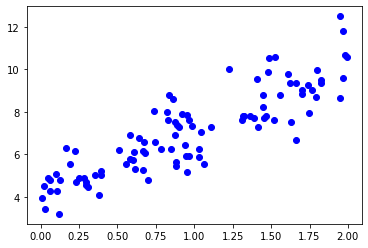

In [5]:
plt.plot(X,y,'bo')

In [6]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.19055783],
       [2.9519647 ]])

In [7]:
def batch_gradient_descent(theta, eta):
  pass

def stoch_gradient_descent():
  pass

def miniB_gradient_descent():
  pass

In [8]:
theta_path_bgd = []
theta_path_sgd = []
theta_path_mgd = []

In [9]:
#batch
m = len(X_b)
n_iterations = 1000
theta = np.random.randn(2,1)
eta = 0.1
for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients
  theta_path_bgd.append(theta)

In [10]:
#stochastic
n_epochs = 50
t0, t1, = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(n_epochs):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients
    theta_path_sgd.append(theta)

In [11]:
#mini batch
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0/(t+t1)

t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

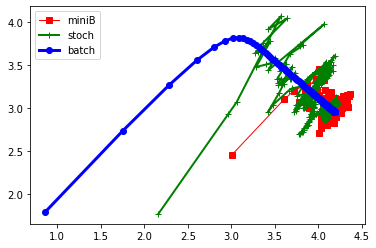

In [12]:
paths = [theta_path_bgd, theta_path_sgd, theta_path_mgd]
styles = [
  ["b-o", 3, "batch"],
  ["g-+", 2, "stoch"],
  ["r-s", 1, "miniB"],
]

for i in range(2, -1, -1):
# for i in range(3):
  path = paths[i]
  style = styles[i]
  path = np.array(path)
  plt.plot(path[:, 0], path[:, 1], style[0], linewidth=style[1], label=style[2])
plt.legend(loc="best")
plt.show()

In [13]:
theta_best, theta_path_bgd[-1], theta_path_sgd[-1], theta_path_mgd[-1]

(array([[4.19055783],
        [2.9519647 ]]),
 array([[4.19055783],
        [2.9519647 ]]),
 array([[4.16132904],
        [3.00078903]]),
 array([[4.24733754],
        [3.01962554]]))